# Expectation-maximisation algorithm

## Exercise 1

Recreate the step-by-step example from the lab so that the algorithm also estimates the variance $\sigma^2$. 

The maximisation step for $\sigma^2_j$ is

$$ \sigma^2_j \leftarrow \frac{\sum_{i=1}^{m}E[z_{ij}](x_i-\mu_j)^2}{\sum_{i=1}^{m}E[z_{ij}]} $$

Use the same data, same starting hypothesis and perform at least 3 iterations.

## Exercise 2

Recreate the step-by-step example from the lab, but also using the fact that $\mu_1=\mu_2-8$.

Use the same data, same starting hypothesis and perform at least 3 iterations.

## Exercise 3

Recreate the step-by-step example from the lab, but instead of the means, estimate the variations, while the means are fixed at $\mu_1 = \mu_2 = 15$.

The maximisation step for $\sigma^2_j$ is

$$ \sigma^2_j \leftarrow \frac{\sum_{i=1}^{m}E[z_{ij}](x_i-\mu_j)^2}{\sum_{i=1}^{m}E[z_{ij}]} $$

Use the same data, same starting hypothesis and perform at least 3 iterations.

## Exercise 4

Recreate the step-by-step example from the lab, but also using the fact that $\mu_1=\frac{\mu_2}{2}$.

Use the same data, same starting hypothesis and perform at least 3 iterations.

In [1]:
import pandas as pd
import numpy as np

d = pd.DataFrame({
    'X': [10, 11, 12, 19, 20, 22]
})

mu1 = 15
mu2 = 15
var = 1.5

def normal_pdf(x, mu, var):
    return (1/np.sqrt(2*np.pi*var)) * np.exp(-(x-mu)**2 / (2*var))

def expectation_step(d, mu1, mu2, var):
    prob1 = normal_pdf(d['X'], mu1, var)
    prob2 = normal_pdf(d['X'], mu2, var)
    prob1_norm = prob1 / (prob1 + prob2)
    prob2_norm = prob2 / (prob1 + prob2)
    return prob1_norm, prob2_norm

def maximization_step(d, prob1_norm, prob2_norm):
    mu1_new = np.sum(d['X'] * prob1_norm) / np.sum(prob1_norm)
    mu2_new = np.sum(d['X'] * prob2_norm) / np.sum(prob2_norm)
    var_new = np.sum((d['X'] - mu1_new)**2 * prob1_norm) / np.sum(prob1_norm)
    return mu1_new, mu2_new, var_new

for i in range(3):
    prob1_norm, prob2_norm = expectation_step(d, mu1, mu2, var)
    mu1, mu2, var = maximization_step(d, prob1_norm, prob2_norm)
    print(f'Iteration {i+1}: mu1={mu1}, mu2={mu2}, var={var}')


ModuleNotFoundError: No module named 'pandas.core.indexes.period'

## Exercise 5

The dataset below is generated by two overlappingn Gaussian distributions in an "X" shape. Use the `GaussianMixture` algorithm from `sklearn` to identify the two clusters and visualise the result. Make sure you read the [API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

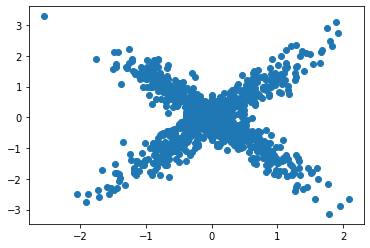

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

n_samples = 500
random_state = 10
X, y = make_blobs(n_samples=n_samples, centers=[(0, 0)], random_state=random_state)
# Anisotropically distributed data
transformation1 = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
transformation2 = [[0.60834549, 0.63667341], [0.40887718, 0.85253229]]
anis1 = np.dot(X, transformation1)
anis2 = np.dot(X, transformation2)
d = np.vstack([anis1, anis2])

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.scatter(d[:,0], d[:,1])
plt.show()